<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/SVMDiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 【problem 1】Lagrange's steepest descent by the undetermined multiplier method

Le SVM est un algorithme de classification binaire à l'instar de la régression logistique. Si ces deux algorithmes permettent de séparer un ensemble d'éléments en deux classes. La machine à vecteur de support opte pour la plus nette séparation possible. Pour cela, les données sont séparées en plusieurs classes grâce à la « marge maximale ». C'est d'ailleurs pour cette raison qu'on la nomme Large Margins classifier.

In [3]:
ZERO = 1e-7
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result = result + alpha[i]*alpha[k]*t[i]*t[k]*np.dot(x[i, :], x[k, :]) 
    result = 0.5*result - sum(alpha)     
    return result

#ScratchSVMClassifier

In [23]:
class ScratchSVMClassifier():
    """
    undefined

    Parameters
    ----------
    num_iter : int
      undefined
    lr : float
      undefined
    kernel : str
      undefined
    threshold : float
      undefined
    verbose : bool
      undefined

    Attributes
    ----------
    self.n_support_vectors : int
      undefined
    self.index_support_vectors : undefined
      undefined
    self.X_sv :  undefined
      undefined
    self.lam_sv :  undefined
      undefined
    self.y_sv :  undefined
      undefined

    """

    def __init__(self, num_iter, lr, knl='linear', threshold=1e-5, verbose=False,degree=1, gamma=1, theta=0):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.knl = knl
        self.threshold = threshold
        self.verbose = verbose
        self.degree = degree
        self.gamma = gamma
        self.theta = theta


    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.label = np.unique(y)
        y = np.where(y == self.label[0], -1, 1)
        
        self.lamda = np.random.rand(len(X))
        
        for i in range(self.iter):
            self._update_lambda(X,y)
            if self.verbose:
                print("iteration: {}, lamda: {}".format(i,self.lamda))
        self.index_support_vector = np.where(self.lamda > self.threshold)[0]
        self.X_sv = X[self.index_support_vector,:]
        self.y_sv = y[self.index_support_vector].reshape(-1,1)
        self.lam_sv = self.lamda[self.index_support_vector].reshape(-1,1)
        self.n_support_vectors = len(self.lam_sv)

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            échantillon

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        n = X.shape[0]
        y_pred = np.zeros(n)
        
        for i in range(n):
            temp = 0
            for j in range(self.n_support_vectors):
                temp += self.lam_sv[j]*self.y_sv[j]*self.kernel(X[i],self.X_sv[j])
            if temp >= 0:
                y_pred[i] = self.label[1]
            else:
                y_pred[i] = self.label[0]
                
        return y_pred

    def _update_lambda(self, X, y):
        """
        Update parameter lambda during training process
        Parameters
        -----------
        X: input data, ndarray (n_samples, n_features)
        y: label data, ndarray (n_samples,)
        """
        n = X.shape[0]
        
        for i in range(n):
            update_sum = 0
            for j in range(n):
                update_sum += self.lamda[j]*y[i]*y[j]*self.kernel(X[i],X[j]) 
            self.lamda[i] += self.lr*(1-update_sum)
            if self.lamda[i] < 0:
                self.lamda[i] = 0
    def kernel(self,Xi,Xj):
        if self.knl=="polly":
          self.gamma=1
          self.theta=0
          self.degree=1
        return (self.gamma*np.dot(Xi,Xj.T)+self.theta)**self.degree
    

# Learning and estimation


### dataset

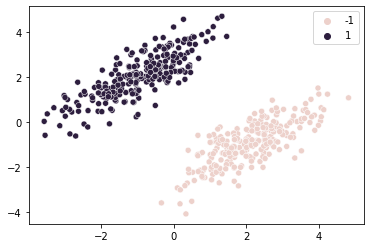

In [14]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])
## vizualisation
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y )
plt.show()


In [24]:
model=ScratchSVMClassifier(num_iter=100, lr=0.001)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20,train_size =0.5)
model.fit(X_train,y_train)

#prediction
y_pred=model.predict(X_test)
y_pred

array([-1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1

In [25]:
# estimation
accuracy_score(y_test,y_pred)

1.0

#Visualization of decision area

In [27]:
def decision_region(X,y,model,step=0.01,title='decision region',xlabel='xlabel',ylabel='ylabel',target_names=['1','-1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = np.array(model.predict(mesh)).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color='yellow', s=80, label='support_vector')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

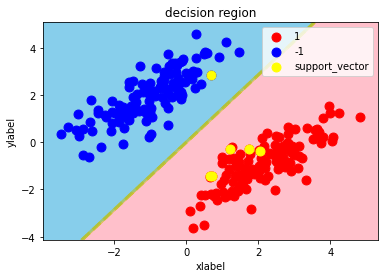

In [28]:
decision_region(X_train,y_train,model)

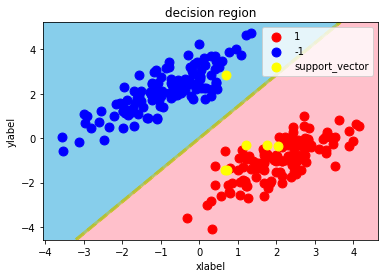

In [29]:
decision_region(X_test,y_pred,model)

#(Advance task) Creation of polynomial kernel function

In [ ]:
def kernel(Xi,Xj,kernel='poly'):
  if type=="poly":
    gamma=1
    theta=0
    d=1
  return (gamma*np.dot(Xi,Xj.T)+theta)**d